In [7]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
import seaborn as sns

data_train = pd.read_csv("toxicComments/train.csv", encoding = "ISO-8859-1")
data_train.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [12]:
dTrain_toxic = data_train.drop(['id','comment_text'],axis= 1)
dTrain_toxic.head()
counts=[]
categories = list(dTrain_toxic.columns.values)
for i in categories:
    counts.append((i,dTrain_toxic[i].sum()))

dTrain_stat = pd.DataFrame(counts,columns=['category','number_of_comments'])    

dTrain_stat


,category,number_of_comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


TypeError: 'function' object is not subscriptable

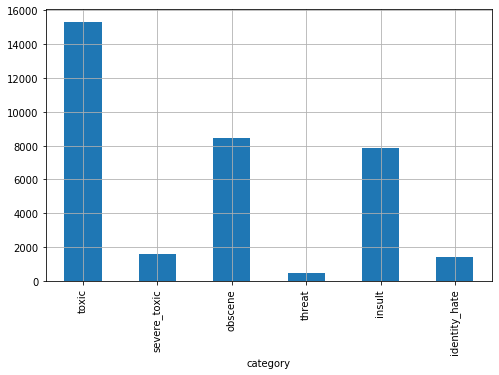

In [14]:
dTrain_stat.plot(x='category',y='number_of_comments',kind='bar',legend=False,grid=True,figsize=(8,5))
plt.title["number of comments per category"]
plt.xlebel('# of ocurrences',fontsize=12)
plt.ylebel('category',forntsize=12)

In [21]:
rowsums = data_train.iloc[:,2:].sum(axis=1)

In [22]:

rowsums


0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Length: 159571, dtype: int64

In [26]:
x=rowsums.value_counts()

In [27]:
x


0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

In [28]:


def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's","what is", text)
    text = re.sub(r"\'s"," ",text)
    text = re.sub(r"can't","can not",text)
    text = re.sub(r"n't"," not",text)
    text = re.sub(r"i'm","i am",text)
    text = re.sub(r"\'re"," are",text)
    text = re.sub(r"\'d", " would",text)
    text = re.sub(r"\'ll", " will",text)
    text=text.strip(' ');
    
    return text
    
    

In [32]:
data_train['comment_text'] = df['comment_text'].map(lambda com : clean_text(com))
categories = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

train,test = train_test_split(data_train,random_state=42, test_size =.33,shuffle=True)

x_train = train.comment_text
x_test = test.comment_text
print(x_train.shape)
print(x_test.shape)

(106912,)
(52659,)


In [40]:
NB_pipeline = Pipeline([('tfidf',TfidfVectorizer(stop_words=stop_words)),
                       ('clf',OneVsRestClassifier(MultinomialNB(
                       fit_prior = True, class_prior =None))),])

for category in categories:
    print('...processing{}'.format(category))
    NB_pipeline.fit(x_train,train[category])
    prediction = NB_pipeline.predict(x_test)
    print('Test accuracy is {}' .format(accuracy_score(test[category],prediction)))

...processingtoxic
Test accuracy is 0.9192160884179342
...processingsevere_toxic
Test accuracy is 0.9900112041626312
...processingobscene
Test accuracy is 0.9515562391993772
...processingthreat
Test accuracy is 0.9971135038644866
...processinginsult
Test accuracy is 0.9517081600486147
...processingidentity_hate
Test accuracy is 0.9910556600011394
